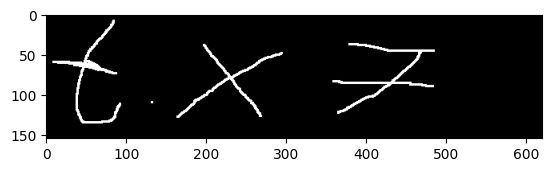

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
# Opening image
img = cv2.imread('./test13.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3,3),np.uint8)
img_gray = cv2.erode(img_gray,kernel,iterations = 1)
img_gray = cv2.bitwise_not(img_gray)
base_size=img_gray.shape[0]+6,img_gray.shape[1]+6
base=np.zeros(base_size,dtype=np.uint8)
base[3:img_gray.shape[0]+3,3:img_gray.shape[1]+3]=img_gray
base = cv2.cvtColor(base, cv2.COLOR_GRAY2RGB)

img_rgb = base

#img_rgb = cv2.bitwise_not(img_rgb)
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

(154, 620, 3)


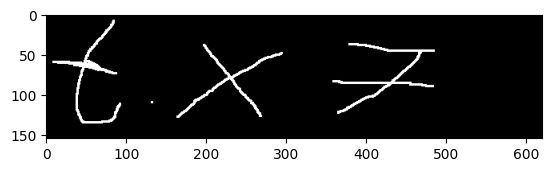

In [2]:
ret,thresh = cv2.threshold(img_rgb,127,255,0)
print(thresh.shape)
plt.subplot(1, 1, 1)
thresh = np.uint8(thresh)
#thresh = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
#thresh = np.array(thresh,dtype=np.uint8)
plt.imshow(thresh)
plt.show()

In [3]:

contours,h = cv2.findContours(thresh[:,:,0], cv2.RETR_EXTERNAL, 2)

In [4]:
print(len(contours))

4


In [5]:
crops = []
for i in range(len(contours)):
    cnt = contours[i]
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    if w*h > 50:
        #x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,0,255),2)
        ret,thresh = cv2.threshold(img_gray[y:y+h, x:x+w],127,255,0)
        crops.append([x,y,w,h]) 
#if(len(crops) > 1):
#    crops = crops[: -1]

In [6]:
print(crops)

[[163, 37, 133, 92], [358, 36, 128, 88], [8, 7, 86, 129]]


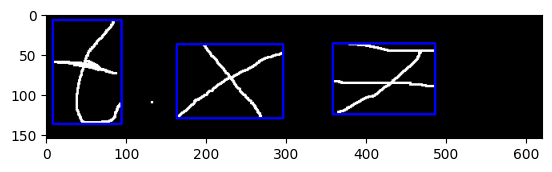

In [7]:
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

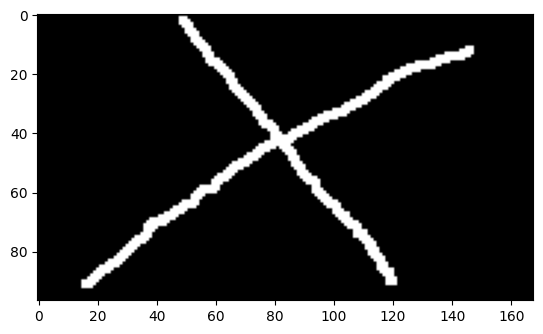

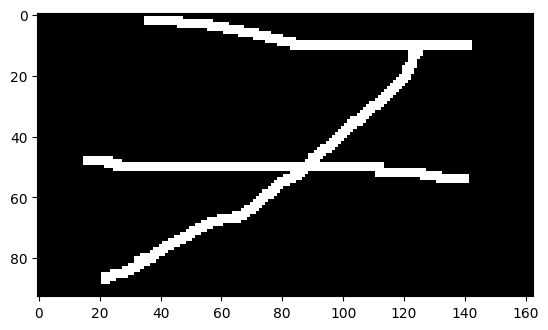

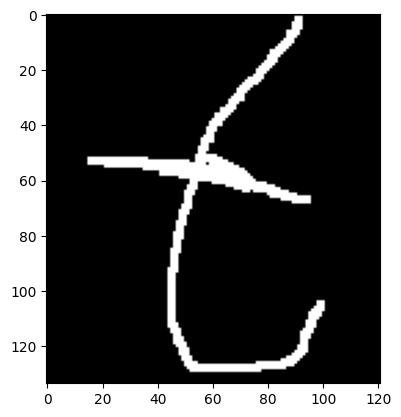

In [8]:
data_img= []
#plt.subplot(1, 1, 1)
for i in range(len(crops)):
    x,y,w,h = crops[i]
    x-=3
    y-=3
    w+=5
    h+=3
    img = img_gray[y:y+h, x:x+w]
    base_size=img.shape[0]+2,img.shape[1]+30
    base=np.zeros(base_size,dtype=np.uint8)
    base[1:img.shape[0]+1,15:img.shape[1]+15]=img
    #plt.imshow(img_gray[y:y+h, x:x+w], cmap="gray")
    plt.imshow(base, cmap="gray")
    data_img.append((x,base))
    plt.show()

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

IMAGE_SIZE = 32
NUM_CLASSES = 22

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(IMAGE_SIZE*IMAGE_SIZE, 4*IMAGE_SIZE*IMAGE_SIZE)
        #self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(4*IMAGE_SIZE*IMAGE_SIZE, 4*NUM_CLASSES)
        #self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(4*NUM_CLASSES, NUM_CLASSES)

    def forward(self, x):
        x = x.view(-1, IMAGE_SIZE*IMAGE_SIZE)
        #x = F.sigmoid(self.fc1(x))
        x = self.fc1(x)
        #x = self.fc1_drop(x)
        #x = F.sigmoid(self.fc2(x))
        x = self.fc2(x)
        #x = self.fc2_drop(x)
        #return F.softmax(self.fc3(x), dim=1)
        return self.fc3(x)

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)
#my_model = CNN().to(device)
# my_model = Net().to(device)
# my_model.load_state_dict(torch.load('./mlp_model_22_classes_1000/mlp_model_22_classes_100.pth'))
# my_model.eval()

Using PyTorch version: 2.9.0+cpu  Device: cpu


In [ ]:
import numpy as np 
#plt.figure(figsize=(10*len(crops), len(crops)))
predict_labels = []
dict_img=dict()
#print(len(data_img))
for i in range(len(data_img)):
    x,img = data_img[i]
    print(img.shape)
    #img = cv2.bitwise_not(img) 
    base_size=img.shape[0]+2,img.shape[1]+2
    base=np.zeros(base_size,dtype=np.float32)
    base[1:img.shape[0]+1,1:img.shape[1]+1]=img
    img = cv2.resize(base,(IMAGE_SIZE,IMAGE_SIZE))
    img = np.asarray(img).astype(float) / 255
    dict_img[x] = img
#print(len(dict_img))
result = sorted(dict_img.items())
dict_img = dict(result)
for k in dict_img:
    print(k)
    data = torch.FloatTensor(dict_img[k])
    result=  my_model(data)
    print(result)
    print(torch.argmax(result))
    predict_labels.append(torch.argmax(result))

In [ ]:
import os
path_to_folder = '.\data' # путь к папке с данными
name_folders = [x[0].split('\\')[-1] for x in os.walk(path_to_folder)]
name_folders = name_folders[1:]
name_folders[18] = '*'
name_folders[20] = '*'
print(name_folders)

In [ ]:
#for i in predict_labels:
#    print(name_folders[i])
if(predict_labels[-1]==3): 
    predict_labels[1]=1
s_res = ''.join(name_folders[i] for i in predict_labels)
print(s_res)

In [ ]:
s_divs = s_res.split('\\')
s_res = s_divs[0]
for i in range(1,len(s_divs)):
    s_res+=' \tdiv ' + s_divs[i]
print(s_res)                   
s_latex = ' \\documentclass{article}\n '+' \\begin{document}\n'+' \\['+s_res+' \\] \n'+' \\end{document}\n'

In [ ]:
print(s_latex)